误分类点为： [ 3 -1] 此时的w和b为： [[0.]
 [0.]] 0
误分类点为： [1 1] 此时的w和b为： [[-3.]
 [ 1.]] -1
误分类点为： [1 1] 此时的w和b为： [[-2.]
 [ 2.]] 0
最终得到的w和b为： [[-1.]
 [ 3.]] 1


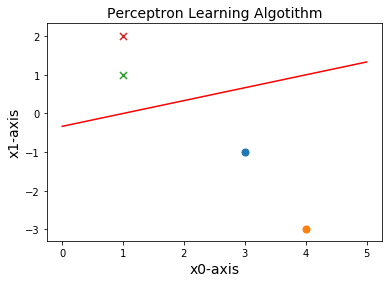

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def createdata():
    samples = np.array([[3,-1],[4,-3],[1,1],[1,2]])
    labels = [-1,-1,1,1]
    return samples,labels
#训练感知机模型
class Perceptron():
    def __init__(self,x,y,a=1):
        self.x=x
        self.y=y
        self.w=np.zeros((x.shape[1],1))
        self.b=0
        self.a=1
        self.numsamples=self.x.shape[0]
        self.numfeatures=self.x.shape[1]

#
    def sign(self,w,b,x):
        y=np.dot(x,w)+b
        return int(y)

    def update(self,label_i,data_i):
        tmp=label_i*self.a*data_i
        tmp=tmp.reshape(self.w.shape)
    
        self.w=tmp+self.w
        self.b=self.b+label_i*self.a
    
    def train(self):
        isFind=False
        while not isFind:
            count=0
            for i in range(self.numsamples):
                tmpY=self.sign(self.w,self.b,self.x[i,:])
                if tmpY*self.y[i]<=0:
                    print('误分类点为：',self.x[i,:],'此时的w和b为：',self.w,self.b)
                
                    count+=1
                    self.update(self.y[i],self.x[i,:])
                 
            if count ==0:
                print('最终得到的w和b为：',self.w,self.b)
                isFind=True
        return self.w,self.b
class Picture():
    def __init__(self,data,w,b):
        self.b=b
        self.w=w
        plt.figure(1)
        plt.title('Perceptron Learning Algotithm',size=14)
        plt.xlabel('x0-axis',size=14)
        plt.ylabel('x1-axis',size=14)
        xData=np.linspace(0,5,100)
        yData=self.expression(xData)
        plt.plot(xData,yData,color='r',label='sample data')
        
        plt.scatter(data[0][0],data[0][1],s=50)
        plt.scatter(data[1][0],data[1][1],s=50)
        plt.scatter(data[2][0],data[2][1],s=50,marker='x')
        plt.scatter(data[3][0],data[3][1],s=50,marker='x')
        
    def expression(self,x):
        y=(-self.b-self.w[0]*x)/self.w[1]
        return y
    def Show(self):
        plt.show()
        
if __name__=='__main__':
    samples,labels=createdata()
    mp=Perceptron(x=samples,y=labels)
    weights,bias=mp.train()
    picture=Picture(samples,weights,bias)
    picture.Show()

# 感知机算法对偶形式

In [16]:
import numpy as np
import matplotlib.pyplot as plt


def createdata():
    samples = np.array([[3,-1],[4,-3],[1,1],[1,2]])
    labels = [-1,-1,1,1]
    return samples,labels
#训练感知机模型
class Perceptron():
    def __init__(self,x,y,a=1):
        self.x=x
        self.y=y
        self.w=np.zeros((x.shape[1],1))
        self.b=0
        self.a=1
        self.numsamples=self.x.shape[0]
        self.numfeatures=self.x.shape[1]
        self.gMatrix=self.cal_gram(self.x)

#定义Gram矩阵
    def cal_gram(self,x):
        gMatrix=np.zeros((self.numsamples,self.numsamples))
        for i in range(self.numsamples):
            for j in range(self.numsamples):
                gMatrix[i][j]=np.dot(self.x[i,:],self.x[j,:])
        return gMatrix
    
    def sign(self,w,b,key):
        y=np.dot(w*self.y,self.gMatrix[:,key])+b
        return int(y)

    def update(self,i):
        self.w[i,]=self.w[i,]+self.a
        self.b=self.b+self.y[i]*self.a
    def cal_w(self):
        w=np.dot(self.w*self.y,self.x)
        return w
    
    def train(self):
        isFind=False
        while not isFind:
            count=0
            for i in range(self.numsamples):
                tmpY=self.sign(self.w,self.b,self.x[i,:])
                if tmpY*self.y[i]<=0:
                    print('误分类点为：',self.x[i,:],'此时的w和b为：',self.w,self.b)
                
                    count+=1
                    self.update(self.y[i],self.x[i,:])
                 
            if count ==0:
                print('最终得到的w和b为：',self.w,self.b)
                isFind=True
        weights=self.cal_w()
        return weights,self.b
class Picture():
    def __init__(self,data,w,b):
        self.b=b
        self.w=w
        plt.figure(1)
        plt.title('Perceptron Learning Algotithm',size=14)
        plt.xlabel('x0-axis',size=14)
        plt.ylabel('x1-axis',size=14)
        xData=np.linspace(0,5,100)
        yData=self.expression(xData)
        plt.plot(xData,yData,color='r',label='sample data')
        
        plt.scatter(data[0][0],data[0][1],s=50)
        plt.scatter(data[1][0],data[1][1],s=50)
        plt.scatter(data[2][0],data[2][1],s=50,marker='x')
        plt.scatter(data[3][0],data[3][1],s=50,marker='x')
        
    def expression(self,x):
        y=(-self.b-self.w[0]*x)/self.w[1]
        return y
    def Show(self):
        plt.show()
        
if __name__=='__main__':
    samples,labels=createdata()
    mp=Perceptron(x=samples,y=labels)
    weights,bias=mp.train()
    picture=Picture(samples,weights,bias)
    picture.Show()

TypeError: only size-1 arrays can be converted to Python scalars

In [28]:
arr=np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [34]:
arr[[1,5,7,2]][:,[0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

误分类点为： [ 3 -3] 此时的w和b为： [[0. 0.]] , 0
最终训练得到的w和b为： [[-5.  9.]] , -1


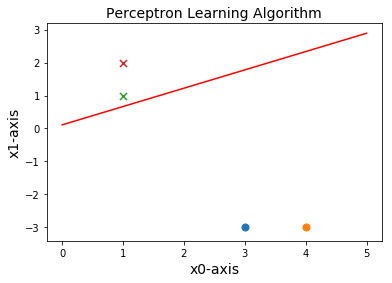

In [15]:

import numpy as np
import matplotlib.pyplot as plt
 
#1、创建数据集
def createdata():
 samples=np.array([[3,-3],[4,-3],[1,1],[1,2]])
 labels=np.array([-1,-1,1,1])
 return samples,labels
 
#训练感知机模型
class Perceptron:
 def __init__(self,x,y,a=1):
  self.x=x
  self.y=y
  self.w=np.zeros((1,x.shape[0]))
  self.b=0
  self.a=1#学习率
  self.numsamples=self.x.shape[0]
  self.numfeatures=self.x.shape[1]
  self.gMatrix=self.cal_gram(self.x)
 
 def cal_gram(self,x):
  gMatrix=np.zeros((self.numsamples,self.numsamples))
  for i in range(self.numsamples):
   for j in range(self.numsamples):
    gMatrix[i][j]=np.dot(self.x[i,:],self.x[j,:])
  return gMatrix
 
 def sign(self,w,b,key):
  y=np.dot(w*self.y,self.gMatrix[:,key])+b
  return int(y)
 
 def update(self,i):
  self.w[i,]=self.w[i,]+self.a
  self.b=self.b+self.y[i]*self.a
 
 def cal_w(self):
  w=np.dot(self.w*self.y,self.x)
  return w
 
 def train(self):
  isFind=False
  while not isFind:
   count=0
   for i in range(self.numsamples):
    tmpY=self.sign(self.w,self.b,i)
    if tmpY*self.y[i]<=0:#如果是一个误分类实例点
     print ('误分类点为：',self.x[i,:],'此时的w和b为：',self.cal_w(),',',self.b)
     count+=1
     self.update(i)
   if count==0:
    print ('最终训练得到的w和b为：',self.cal_w(),',',self.b)
    isFind=True
  weights=self.cal_w()
  return weights,self.b
 
#画图描绘
class Picture:
 def __init__(self,data,w,b):
  self.b=b
  self.w=w
  plt.figure(1)
  plt.title('Perceptron Learning Algorithm',size=14)
  plt.xlabel('x0-axis',size=14)
  plt.ylabel('x1-axis',size=14)
 
  xData=np.linspace(0,5,100)
  yData=self.expression(xData)
  plt.plot(xData,yData,color='r',label='sample data')
 
  plt.scatter(data[0][0],data[0][1],s=50)
  plt.scatter(data[1][0],data[1][1],s=50)
  plt.scatter(data[2][0],data[2][1],s=50,marker='x')
  plt.scatter(data[3][0],data[3][1],s=50,marker='x')
  plt.savefig('2d.png',dpi=75)
 
 def expression(self,x):
  y=(-self.b-self.w[:,0]*x)/self.w[:,1]
  return y
 
 def Show(self):
  plt.show()
 
 
if __name__ == '__main__':
 
 samples,labels=createdata()
 myperceptron=Perceptron(x=samples,y=labels)
 weights,bias=myperceptron.train()
 Picture=Picture(samples,weights,bias)
 Picture.Show()


Object `first.strip` not found.
